In [83]:
#4章　モデルの訓練
# 数学系はオンライン補助教材のノートみてね。
#4.1 線形回帰
# 二乗平均平方根誤差RMSEを最小にする
#4.1.1 正規方程式
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1) #無作為に線形データセットを作成

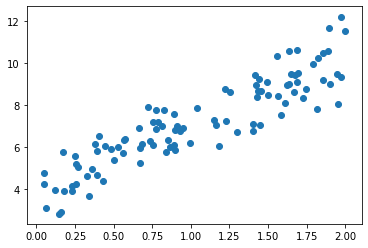

In [84]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.show()

In [85]:
X_b = np.c_[np.ones((100, 1)), X] #各インスタンスにx0 = 1を加える
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best #θ_0=3.9, θ_1=2.9

array([[3.93031704],
       [3.14322642]])

In [86]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #各インスタンスにx0=1を加える
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.93031704],
       [10.21676988]])

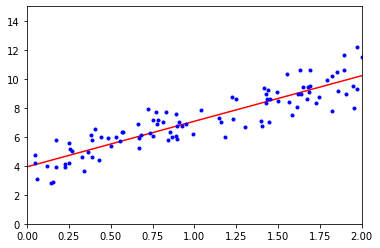

In [87]:
# 
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


In [88]:
#sklearnでやるとこうなる。
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.93031704]), array([[3.14322642]]))

In [89]:
lin_reg.predict(X_new)

array([[ 3.93031704],
       [10.21676988]])

In [90]:
#4.1.2 計算量
#4.2 勾配降下法
#4.2.1 バッチ勾配降下法
eta = 0.1 #η 学習率（どれくらい値を更新するか）
n_iterations = 1000
m = 100#訓練インスタンス数

theta = np.random.randn(2, 1) # 無作為な初期値

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[3.93031704],
       [3.14322642]])

In [91]:
#4.2.2 確率的勾配降下法　SGD
n_epochs = 50
t0, t1 = 5, 50 #学習スケジュールのハイパーパラメータ

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [92]:
theta

array([[3.87061448],
       [3.20546453]])

In [93]:
#skelarnでSGD　デフォで二乗誤差がコスト関数に最適化されている
from sklearn.linear_model import SGDRegressor

#sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) #n_iterがない。
sgd_reg = SGDRegressor( penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [94]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.89578615]), array([3.13132408]))

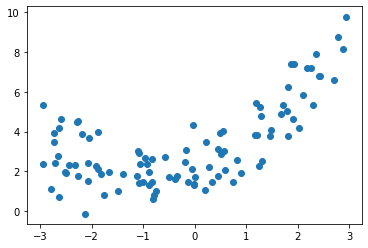

In [95]:
#4.2.3 ミニバッチ勾配降下法
#4.3 多項式回帰　非線形データに線形モデルを適合させる。各特徴量の累乗を新特徴量として追加する。
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.95582471])

In [97]:
X_poly[0]

array([-2.95582471,  8.7368997 ])

In [98]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ #y=0.516*X**2 + 1.0455X + 1.955 という推測

(array([2.15334602]), array([[0.87791719, 0.45907849]]))

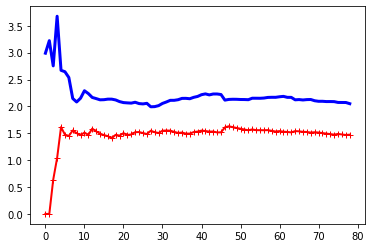

In [99]:
#学習曲線
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    
                  
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y) # red: training set, blue: validation set

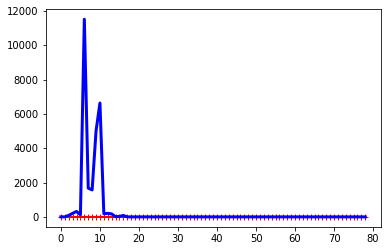

In [100]:
#同じデータで１０次多項モデルの学習曲線
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

In [101]:
#リッジ回帰
#線形回帰の正則化コスト関数にαΣθ^2  (i=1 - n)という正則化項
#J = MSE + α* 1/2 *Σθ^2

#閉形式の解（アンドレ・ルイ・コレスキーの行列分解）でリッジ回帰
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.58883769]])

In [102]:
#確率的勾配降下法
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.55798369])

In [103]:
#4.5.2 Lasso回帰 コスト関数に正則化項を加えるが、l１ノルムを使う
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1) #SGDRegressor(penalty="l1")でもおk
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.53374093])

In [104]:
#4.5.3 Elastic Net
#ENの正則化項はリッジ回帰とRasso回帰の正則化項を混ぜ合わせたもの。混ぜ方の割合r
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.54217166])

In [115]:
#4.5.4 早期打ち切り
#検証誤差が最小値に達したところで訓練を中心する。
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler #なかったので追加

#データの準備
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
    ("std_scaler", StandardScaler() )
     ])


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)  #勝手に追加
X_train_poly_scaled = poly_scaler.fit_transform(X_train)#X_train定義されてないけど。
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(#n_iter=1,
                       warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #中断したところから継続
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

In [ ]:
#4.6 ロジスティック回帰
#インスタンスが特定のクラスに属する確率を推計する。50%以上ならpositive class
#4.6.1 確率の推計
#4.6.2 訓練とコスト関数

In [125]:
#4.6.3 決定境界
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [128]:
X = iris["data"][:, 3:] #花弁の幅
y = (iris["target"] == 2).astype(np.int) #バージニカなら１、他は０

In [129]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

//anaconda3/envs/rindoku/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

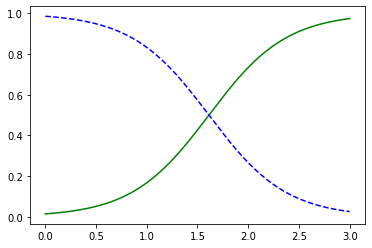

In [135]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) 
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

plt.show()

In [137]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [139]:
#4.6.4 ソフトマックス回帰
X = iris["data"][:, (2, 3)] #花弁の長さ、花弁の幅
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [140]:
softmax_reg.predict([[5, 2]])

array([2])

In [142]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])